### Salary prediction

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### loading the data

In [50]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


#### removing duplicates and null values

In [52]:
df.duplicated().sum()

161

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df.isna().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [55]:
df.dropna(inplace=True)

#### statistical summary of the data

In [56]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000,2470.000000
mean,24.725506,58055.764777,22.490688,7.509312,3.482186,1.555870
std,3.908838,36776.484770,4.597236,4.597236,1.115217,2.703656
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46737.500000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


#### FIRST NAME: First name of the data professional (String)
#### LAST NAME: Last name of the data professional (String)
#### SEX: Gender of the data professional (String: 'F' for Female, 'M' for Male)
#### DOJ (Date of Joining): The date when the data professional joined the company (Date in MM/DD/YYYY format)
#### CURRENT DATE: The current date or the snapshot date of the data (Date in MM/DD/YYYY format)
#### DESIGNATION: The job role or designation of the data professional (String: e.g., Analyst, Senior Analyst, Manager)
#### AGE: Age of the data professional (Integer)
#### SALARY: Annual salary of the data professional (Float)
#### UNIT: Business unit or department the data professional works in (String: e.g., IT, Finance, Marketing)
#### LEAVES USED: Number of leaves used by the data professional (Integer)
#### LEAVES REMAINING: Number of leaves remaining for the data professional (Integer)
#### RATINGS: Performance ratings of the data professional (Float)
#### PAST EXP: Past work experience in years before joining the current company (Float)

#### lowercasing and removing unnecessary columns

In [57]:
df.columns = df.columns.str.lower()
df.columns

Index(['first name', 'last name', 'sex', 'doj', 'current date', 'designation',
       'age', 'salary', 'unit', 'leaves used', 'leaves remaining', 'ratings',
       'past exp'],
      dtype='object')

In [58]:
df.drop(['first name','last name','sex','leaves used','leaves remaining'],axis=1,inplace=True)

In [59]:
df.designation.value_counts()

designation
Analyst           1848
Senior Analyst     301
Associate          155
Manager             79
Senior Manager      60
Director            27
Name: count, dtype: int64

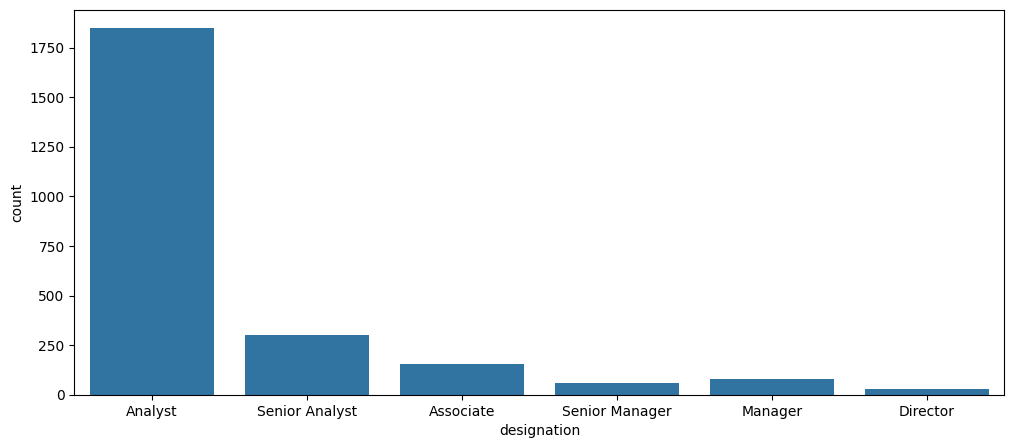

In [60]:
plt.figure(figsize=(12,5))
sns.countplot(x=df.designation)
plt.show()

In [61]:
print(f"The oldest employee is {df.age.max()} years")
print(f"The youngest employee is {df.age.min()} years")

The oldest employee is 45.0 years
The youngest employee is 21.0 years


In [62]:
df.age = df.age.astype('int64')

<Axes: xlabel='age', ylabel='Count'>

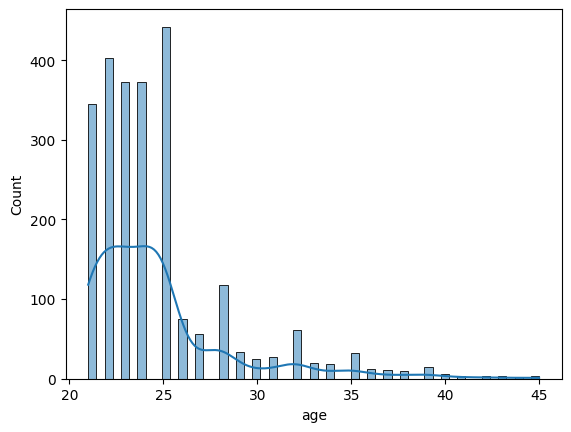

In [63]:
sns.histplot(x=df.age,kde=True)

#### we can see that the age column has outliers

<Axes: xlabel='age'>

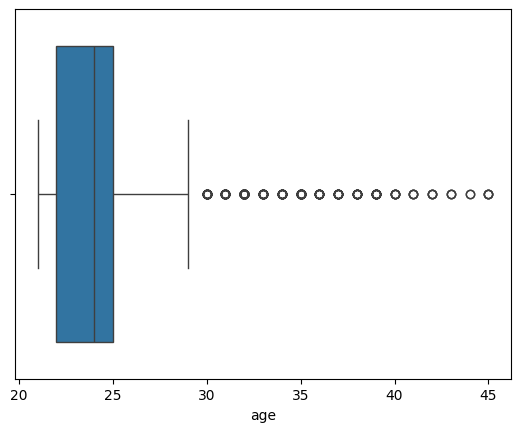

In [64]:
sns.boxplot(x=df.age)

In [65]:
print(f"Highest annual salary is ${df.salary.max()}")
print(f"Lowest annual salary is ${df.salary.min()}")

Highest annual salary is $388112
Lowest annual salary is $40001


<Axes: xlabel='salary', ylabel='Count'>

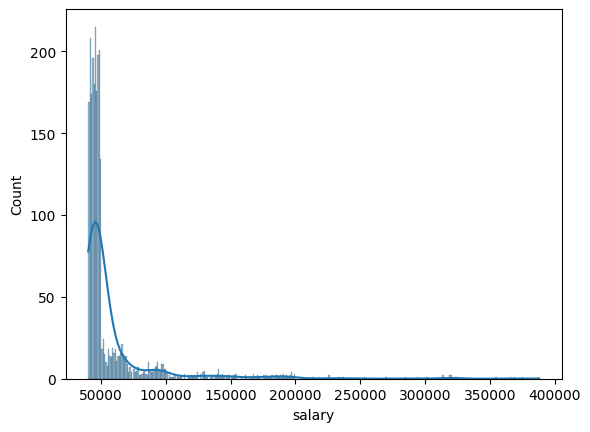

In [66]:
sns.histplot(x=df.salary,kde=True)

<Axes: xlabel='salary'>

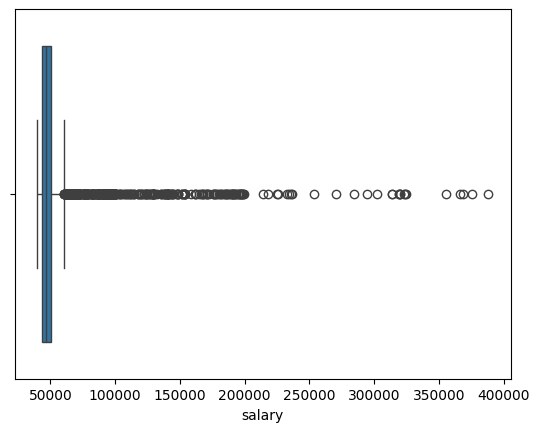

In [67]:
sns.boxplot(x=df.salary)

In [68]:
df.head()

,doj,current date,designation,age,salary,unit,ratings,past exp
0,5-18-2014,01-07-2016,Analyst,21,44570,Finance,2.0,0
2,7-28-2014,01-07-2016,Analyst,21,40955,Finance,3.0,0
3,04-03-2013,01-07-2016,Analyst,22,45550,IT,3.0,0
6,09-02-2013,01-07-2016,Analyst,22,40339,Marketing,5.0,0
8,6-29-2014,01-07-2016,Senior Analyst,28,63478,Operations,3.0,1


In [69]:
df.unit.value_counts()

unit
IT            436
Finance       416
Operations    415
Marketing     409
Web           397
Management    397
Name: count, dtype: int64

<Axes: xlabel='unit', ylabel='count'>

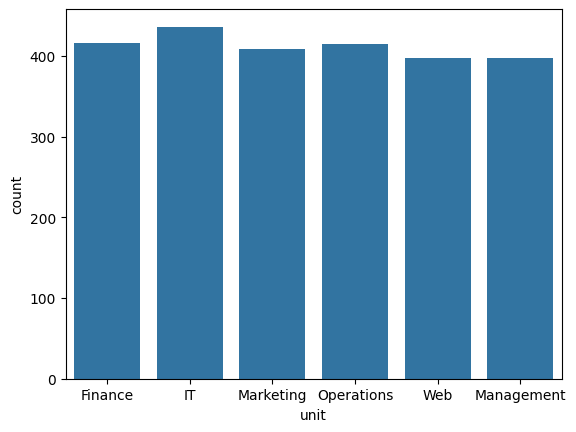

In [70]:
sns.countplot(x=df.unit)

In [71]:
df.ratings.max()

5.0

In [72]:
df.ratings.min()

2.0

In [73]:
df['past exp'].max()

23

In [74]:
df['past exp'].min()

0

<Axes: xlabel='past exp', ylabel='Count'>

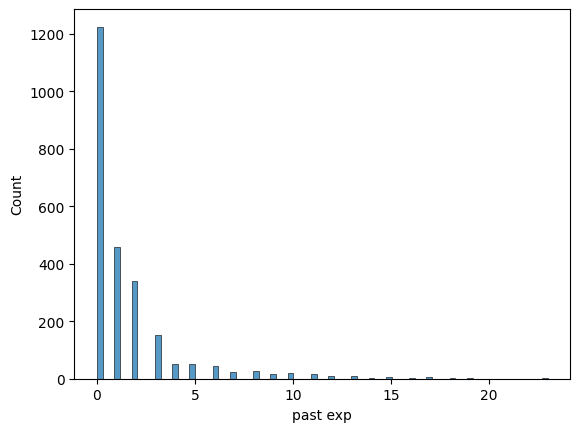

In [75]:
sns.histplot(x=df['past exp'])

<Axes: xlabel='past exp'>

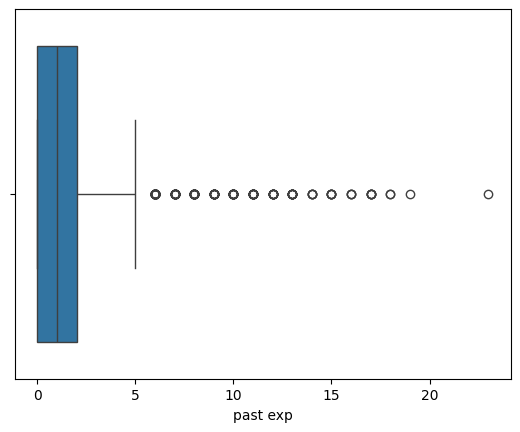

In [76]:
sns.boxplot(x=df['past exp'])

In [77]:
df.head()

,doj,current date,designation,age,salary,unit,ratings,past exp
0,5-18-2014,01-07-2016,Analyst,21,44570,Finance,2.0,0
2,7-28-2014,01-07-2016,Analyst,21,40955,Finance,3.0,0
3,04-03-2013,01-07-2016,Analyst,22,45550,IT,3.0,0
6,09-02-2013,01-07-2016,Analyst,22,40339,Marketing,5.0,0
8,6-29-2014,01-07-2016,Senior Analyst,28,63478,Operations,3.0,1


In [78]:
df.shape

(2470, 8)

In [79]:
columns_with_outliers = ['age','salary','past exp']
for col in columns_with_outliers:
    upper = df[col].mean() + (2*df[col].std())
    lower = df[col].mean() - (2*df[col].std())
    df = df[(df[col] < upper) & (df[col] > lower)]
df.shape

(2122, 8)

In [80]:
df.head()

,doj,current date,designation,age,salary,unit,ratings,past exp
0,5-18-2014,01-07-2016,Analyst,21,44570,Finance,2.0,0
2,7-28-2014,01-07-2016,Analyst,21,40955,Finance,3.0,0
3,04-03-2013,01-07-2016,Analyst,22,45550,IT,3.0,0
6,09-02-2013,01-07-2016,Analyst,22,40339,Marketing,5.0,0
8,6-29-2014,01-07-2016,Senior Analyst,28,63478,Operations,3.0,1


#### we need to create a column that stores the number of days employee has been in the company,but first we need to make the date columns in a good format

In [81]:
def data_formatter(x):
    # transform 5-18-2014 data format to 05-18-2014
    if (type(x) == str):
        x = x.split('-') 
        # Padding the Month with a Leading Zero
        if len(x[0]) == 1 and x[0][0] != 0:
            x[0] = '0' + x[0]
            x = '-'.join(x)

df.doj.apply(data_formatter).inplace=True

In [82]:
def convert_to_datetime(date_str, date_format='%m-%d-%Y'):
    if isinstance(date_str, str):
        return pd.to_datetime(date_str, format=date_format)
    return date_str


df.doj= df.doj.apply(lambda x: convert_to_datetime(x, '%m-%d-%Y'))
df['current date'] = df['current date'].apply(lambda x: convert_to_datetime(x, '%m-%d-%Y'))

In [83]:
df['dys_in_cmpany'] = (df['current date'] - df['doj']).dt.days

In [84]:
df.head()

,doj,current date,designation,age,salary,unit,ratings,past exp,dys_in_cmpany
0,2014-05-18,2016-01-07,Analyst,21,44570,Finance,2.0,0,599
2,2014-07-28,2016-01-07,Analyst,21,40955,Finance,3.0,0,528
3,2013-04-03,2016-01-07,Analyst,22,45550,IT,3.0,0,1009
6,2013-09-02,2016-01-07,Analyst,22,40339,Marketing,5.0,0,857
8,2014-06-29,2016-01-07,Senior Analyst,28,63478,Operations,3.0,1,557


#### now we convert the newly created column from days to years ,then calculate the current work experience of employee by adding it to 'past exp' column

In [85]:
df['yrs_in_cmpany'] = (df['dys_in_cmpany'] / 365).astype('int64')

In [86]:
df.drop(['doj','current date','dys_in_cmpany'],axis=1,inplace=True)
df.head()

,designation,age,salary,unit,ratings,past exp,yrs_in_cmpany
0,Analyst,21,44570,Finance,2.0,0,1
2,Analyst,21,40955,Finance,3.0,0,1
3,Analyst,22,45550,IT,3.0,0,2
6,Analyst,22,40339,Marketing,5.0,0,2
8,Senior Analyst,28,63478,Operations,3.0,1,1


In [87]:
df['experience'] = df['past exp'] + df['yrs_in_cmpany']
df.drop(['past exp','yrs_in_cmpany'],axis=1,inplace=True)
df.head()

,designation,age,salary,unit,ratings,experience
0,Analyst,21,44570,Finance,2.0,1
2,Analyst,21,40955,Finance,3.0,1
3,Analyst,22,45550,IT,3.0,2
6,Analyst,22,40339,Marketing,5.0,2
8,Senior Analyst,28,63478,Operations,3.0,2


In [88]:
df.designation.value_counts()

designation
Analyst           1848
Senior Analyst     256
Associate           18
Name: count, dtype: int64

In [89]:
df.unit.value_counts()

unit
IT            378
Operations    367
Finance       352
Marketing     347
Web           344
Management    334
Name: count, dtype: int64

In [90]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [91]:
on_ht_cols = ['designation','unit']
sc_cols = ['age','ratings','experience']

encoder = OneHotEncoder()
scaler = StandardScaler(with_mean=False)

one_htpipe = Pipeline(steps=[
    ('encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
])
sc_pipe = Pipeline(steps=[
    ('scaler',StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer([
    ('on_htpipe',one_htpipe,on_ht_cols),
    ('sc_pipe',sc_pipe,sc_cols)
])

In [92]:
X = df.drop('salary',axis=1)
y = df.salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [93]:
models = {
    'Linear Regression':LinearRegression(),
    'KNeighbours':KNeighborsRegressor(),
    'Cat Boost':CatBoostRegressor(),
    'XGB':XGBRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),  
}

In [94]:
report = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = mean_absolute_error(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = min(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with score of {best_score}")

Learning rate set to 0.04406
0:	learn: 6099.8729835	total: 537ms	remaining: 8m 56s
1:	learn: 5927.0532388	total: 542ms	remaining: 4m 30s
2:	learn: 5773.5057939	total: 546ms	remaining: 3m 1s
3:	learn: 5632.0259688	total: 554ms	remaining: 2m 17s
4:	learn: 5495.7179721	total: 559ms	remaining: 1m 51s
5:	learn: 5352.3775196	total: 560ms	remaining: 1m 32s
6:	learn: 5224.4549913	total: 562ms	remaining: 1m 19s
7:	learn: 5113.4700269	total: 567ms	remaining: 1m 10s
8:	learn: 4992.5243211	total: 569ms	remaining: 1m 2s
9:	learn: 4883.7667754	total: 572ms	remaining: 56.6s
10:	learn: 4789.4841986	total: 574ms	remaining: 51.6s
11:	learn: 4696.7219391	total: 576ms	remaining: 47.5s
12:	learn: 4601.2598466	total: 579ms	remaining: 43.9s
13:	learn: 4512.2455802	total: 581ms	remaining: 40.9s
14:	learn: 4434.3134041	total: 587ms	remaining: 38.6s
15:	learn: 4359.2836813	total: 589ms	remaining: 36.2s
16:	learn: 4290.6913558	total: 592ms	remaining: 34.2s
17:	learn: 4221.8737258	total: 594ms	remaining: 32.4s
18

In [95]:
regressor = models[best_model_name]

In [96]:
regressor.fit(X_train,y_train)
pred = regressor.predict(X_test)
pred[:10]

array([45112., 45220., 44860., 45090., 44832., 45218., 45416., 45286.,
       45048., 44998.])

In [97]:
y_test[:10]

1841    45249
484     44664
347     44712
2165    41988
393     44134
1124    45485
1934    41308
2072    45729
717     47525
1093    48203
Name: salary, dtype: int64

In [98]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/processed_df.csv',index=False)